In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt



In [19]:
original_df = pd.read_csv('data/train.csv') 

df = original_df.copy()
df.info()

df.date = df.date.apply(lambda x: str(x)[:-3])
df = df.groupby('date')['sales'].sum().reset_index()
df.date = pd.to_datetime(df.date)

df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382


1825 days
5.0 years


[Text(0.5, 0, 'Sales Per day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distrobution of Sales Per Day')]

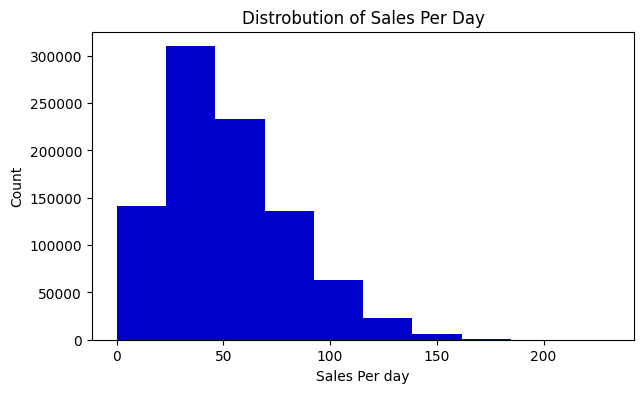

In [20]:
original_df.date = pd.to_datetime(original_df.date)
number_of_days = original_df.date.max() - original_df.date.min()
number_of_years = number_of_days.days / 365
print(number_of_days.days, 'days')
print(number_of_years, 'years')

fig, ax = plt.subplots(figsize=(7,4))
plt.hist(original_df.sales, color='mediumblue')

ax.set(xlabel = "Sales Per day",
        ylabel = "Count",
        title = "Distribution of Sales Per Day")

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

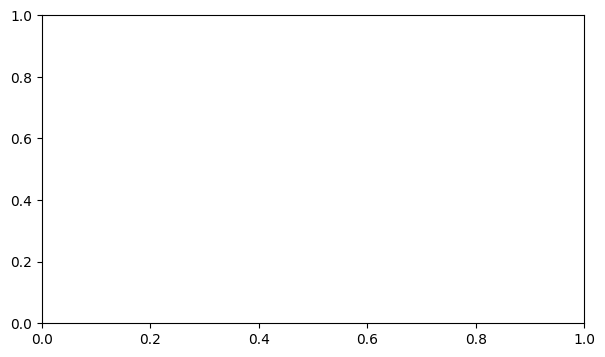

In [21]:
by_store = original_df.groupby('store')['sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(by_store.store, by_store.sales, color='mediumblue')

ax.set(xlabel = "Store ID",
        ylabel = "Number of Sales",
        title = "Total Sales Per Store")

sns.despine()